# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig
from Visualization_helpers import *

2024-09-16 18:33:33.888624: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 18:33:33.889352: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 18:33:33.893312: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 18:33:33.944211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-16 18:33:35.563248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [39]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
#tma.clear_directory(text_curater="RF_BL", directory="nfault") #, not_text=[]

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

Preparing to delete 150 files
First 10 file names to be deleted
-------------------------------------------------
['/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(e42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(d42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(r42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(s42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(t42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/audiology/RF_BL(r42)_AP(0.05-0.1-0.3-0.2)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/audiology/RF_BL(s42)_AP(0.05-0.1-0.3-0.2)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/audiology/RF_BL(e42)_AP(0.05-0.1-0.3-

Files Deleted.


True

In [4]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="car.csv", split= "random", percent_of_anchors= [0.05], verbose=2, random_state= 42)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_RF_SPUD_tests()
#test.run_DIG_tests(predict = False, page_ranks=["None"])
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
#test.run_JLMA_tests()
#test.run_PCR_tests()
#test.run_DIG_Conections_tests(page_ranks=["None"], predict = False)
#test.run_CSPUD_tests(operations= ["log", "sqrt", "normalize"])
#test.run_MALI_tests()
#test.run_RF_MASH_tests(DTM = ("hellinger", "log", "kl"))
#test.run_KEMA_tests()
#test.run_RF_BL_tests()


 
 
---------------------------       Initalizing class with car.csv data       ---------------------------

MDS initialized with 2 components
The knn values are: (2, 37, 72, 107, 142, 177, 212, 247, 282, 317)

--------------------------------------   RF Gap Baseline Tests car   --------------------------------------

SCORE A: 0.7002314814814815
SCORE B: 0.9432870370370371


True

In [4]:
#To upload new data
create_DataFrames()

In [5]:
"""
# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other
grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(
    csv_count=('csv_file', 'nunique'),   # Count occurrences of each seed
    method_count=('method', 'nunique')  # Count unique methods using each seed
).reset_index()

grouped["seed"].values
"""

'\n# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other\ngrouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby([\'seed\']).agg(\n    csv_count=(\'csv_file\', \'nunique\'),   # Count occurrences of each seed\n    method_count=(\'method\', \'nunique\')  # Count unique methods using each seed\n).reset_index()\n\ngrouped["seed"].values\n'

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

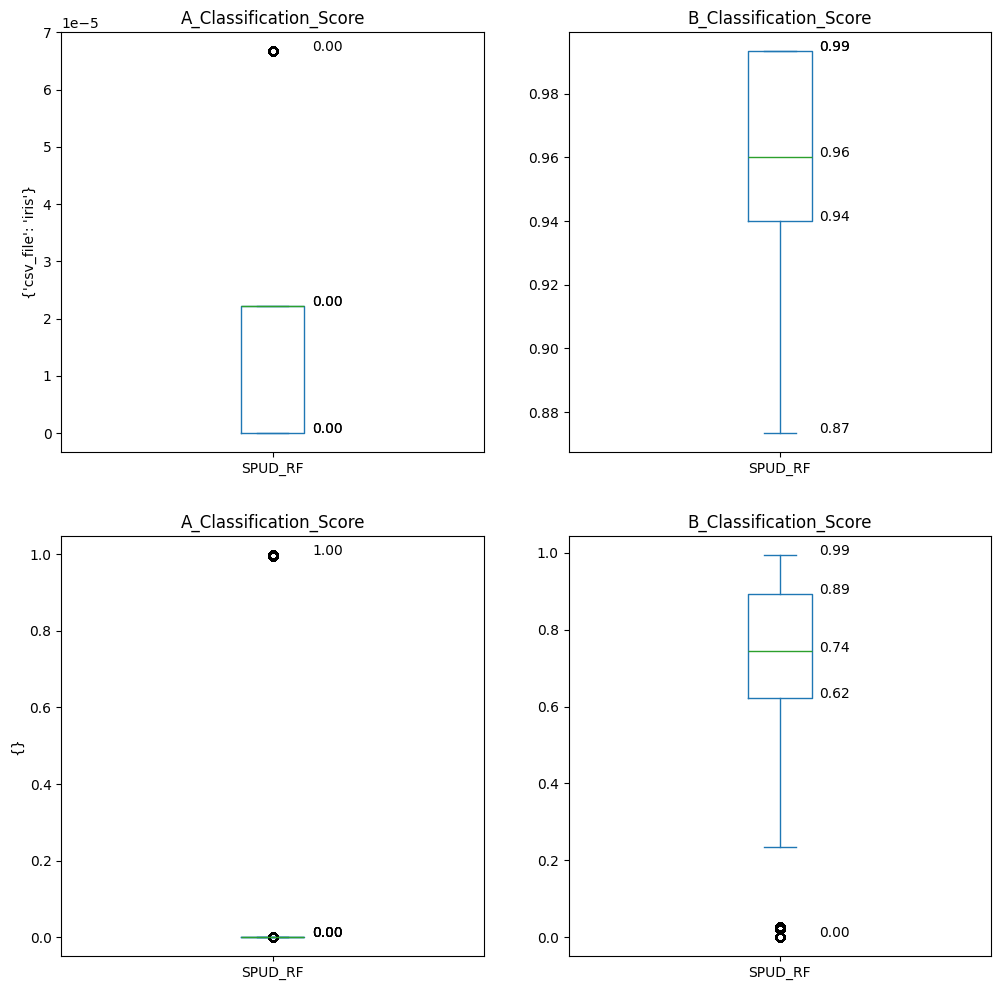

In [6]:
columns = [{"column": 'A_Classification_Score'}, {"column": 'B_Classification_Score'}]
rows = [{"csv_file" : "iris" #, "csv_file" : "iris"
         }, 
        {}]

plot_in_fig(df = subset_df(rf_df, method = "SPUD_RF"), columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

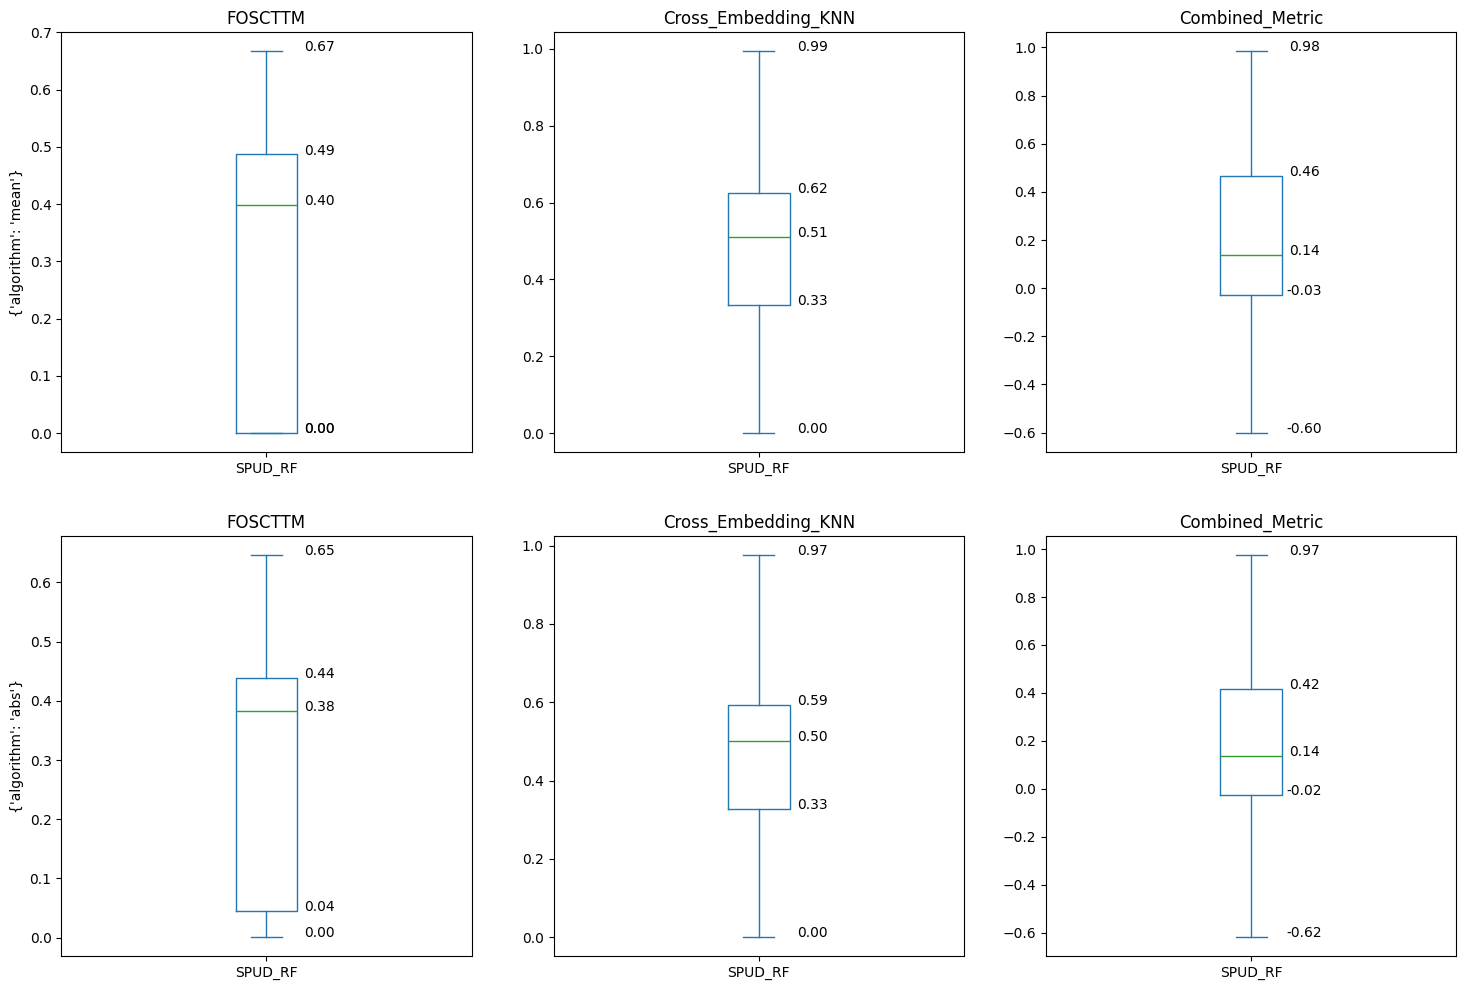

In [7]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"algorithm" : "mean" #, "csv_file" : "iris"
         }, 
        {"algorithm" : "abs" #, "csv_file" : "iris"
         }]

plot_in_fig(df = subset_df(rf_df, method = "SPUD_RF"), columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

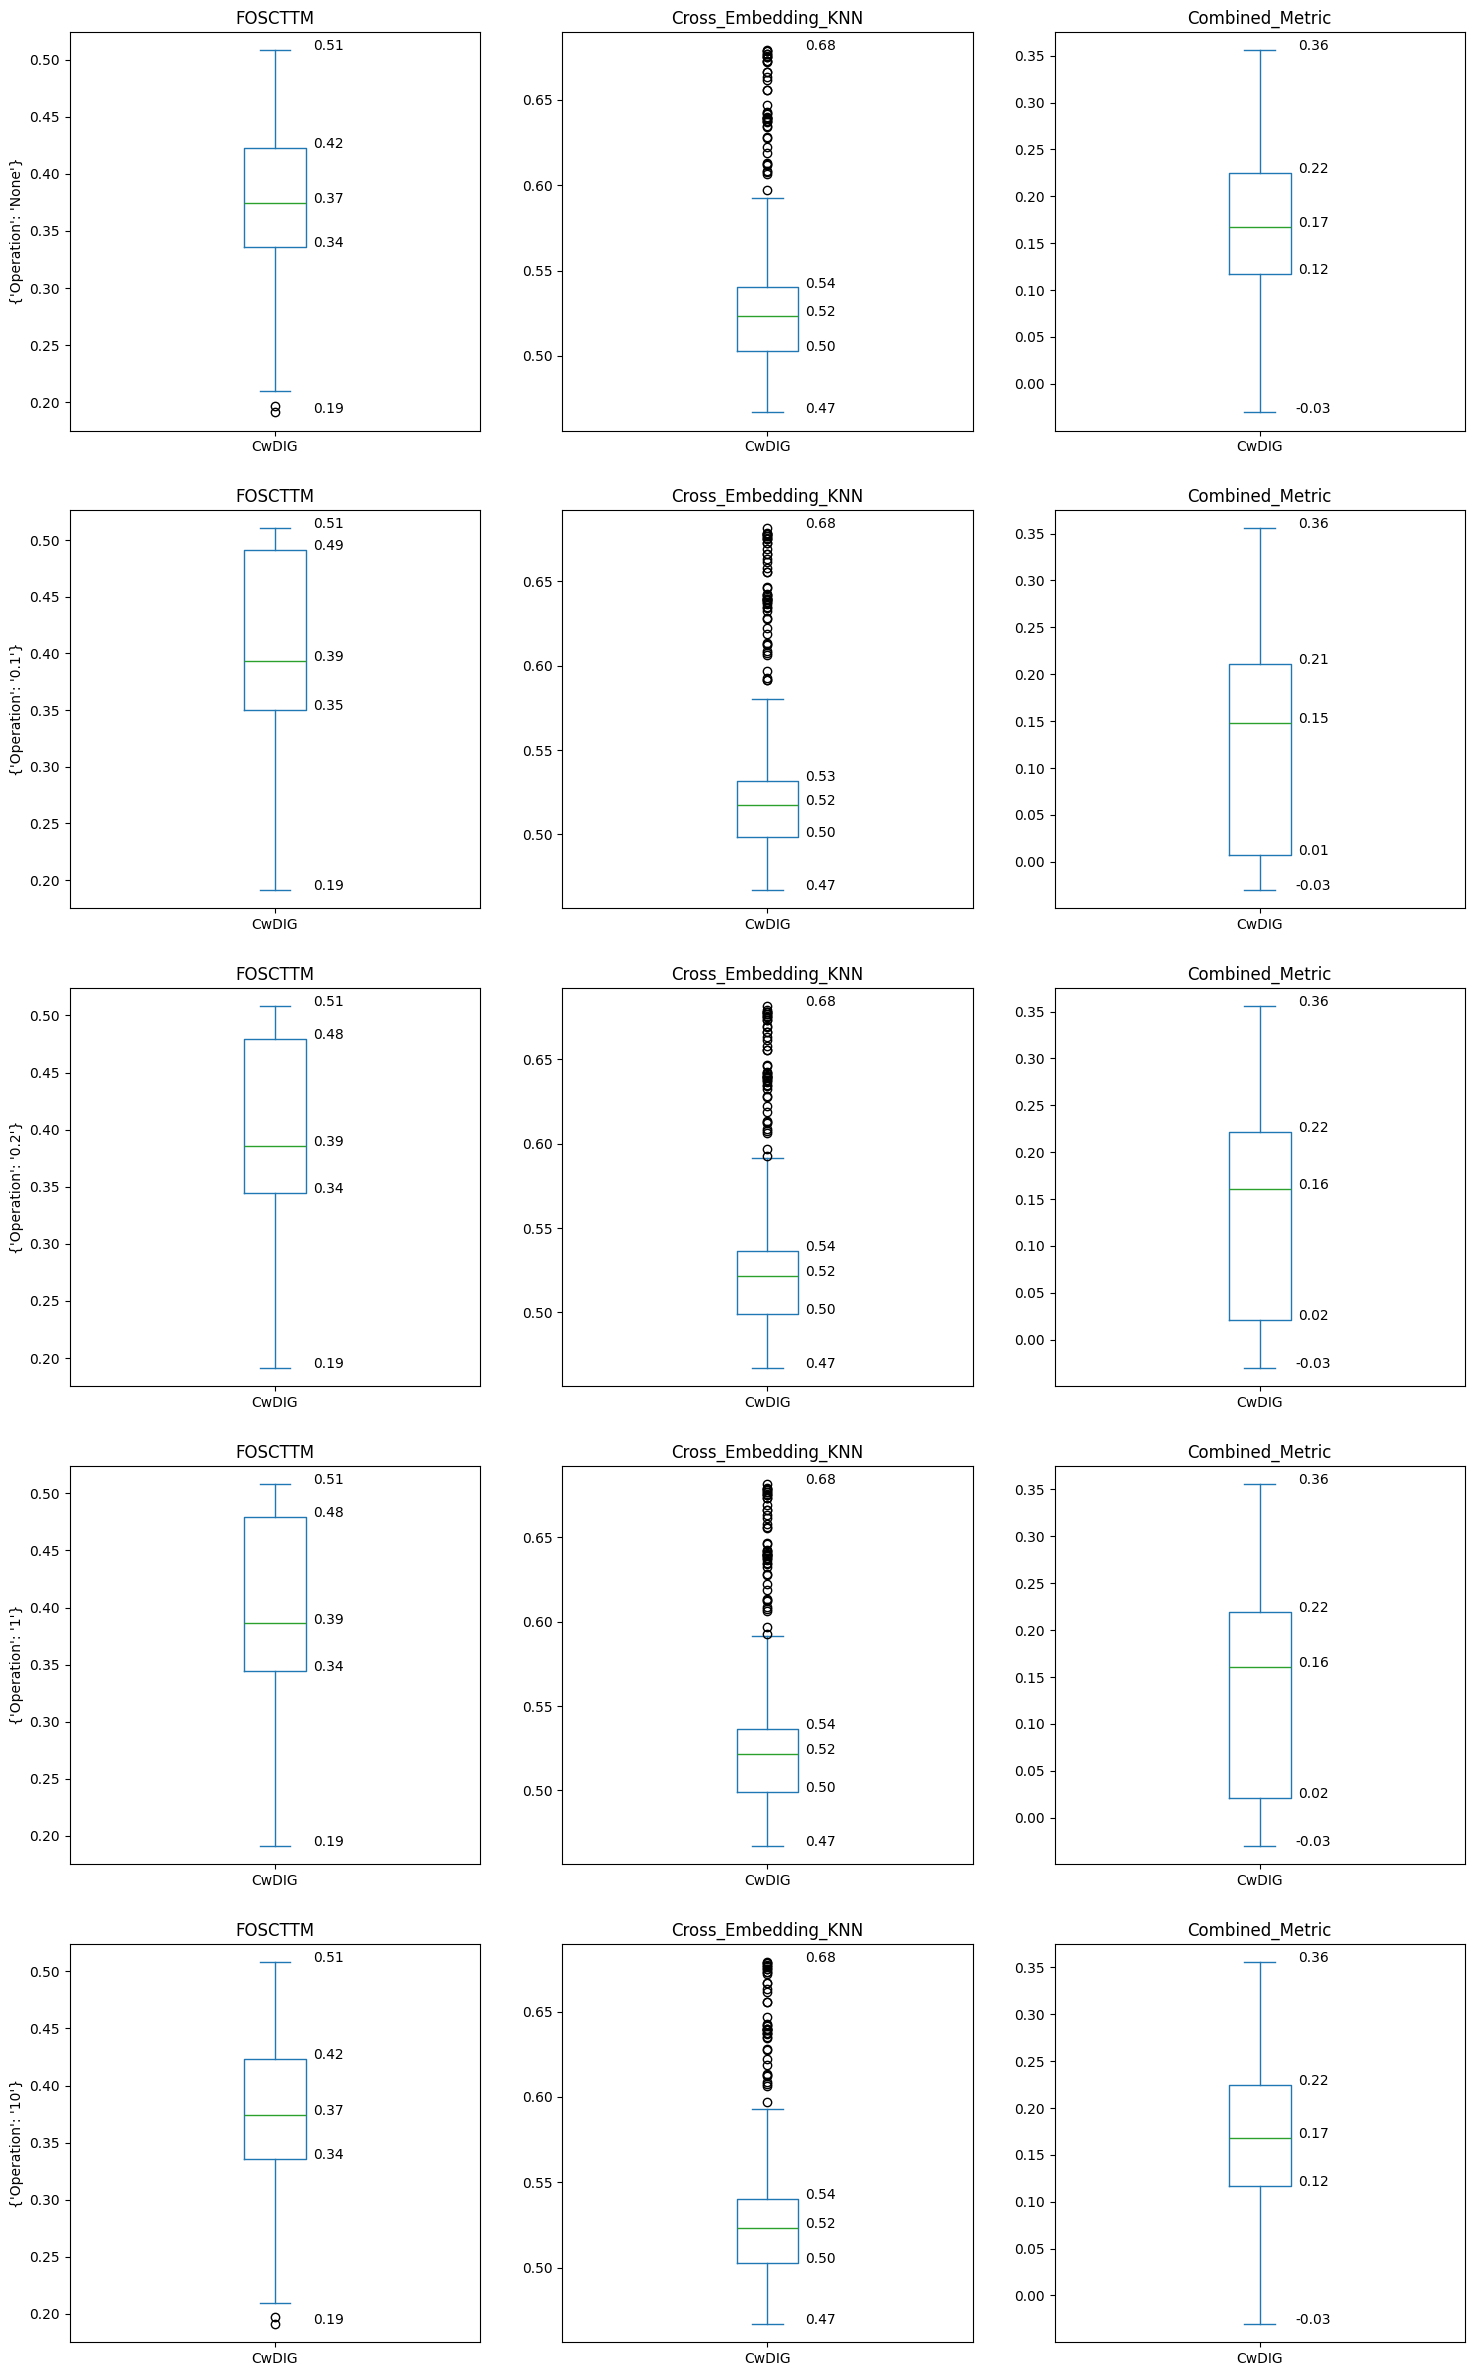

In [8]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"Operation" : "None"}, 
        {"Operation" : "0.1"},
         {"Operation" : "0.2"}, 
        {"Operation" : "1"},
        {"Operation" : "10"}]

plot_in_fig(df = subset_df(df, method = "CwDIG", csv_file = "chess"), columns = columns, plot_labels = True, rows = rows, by='method', kind = 'box')

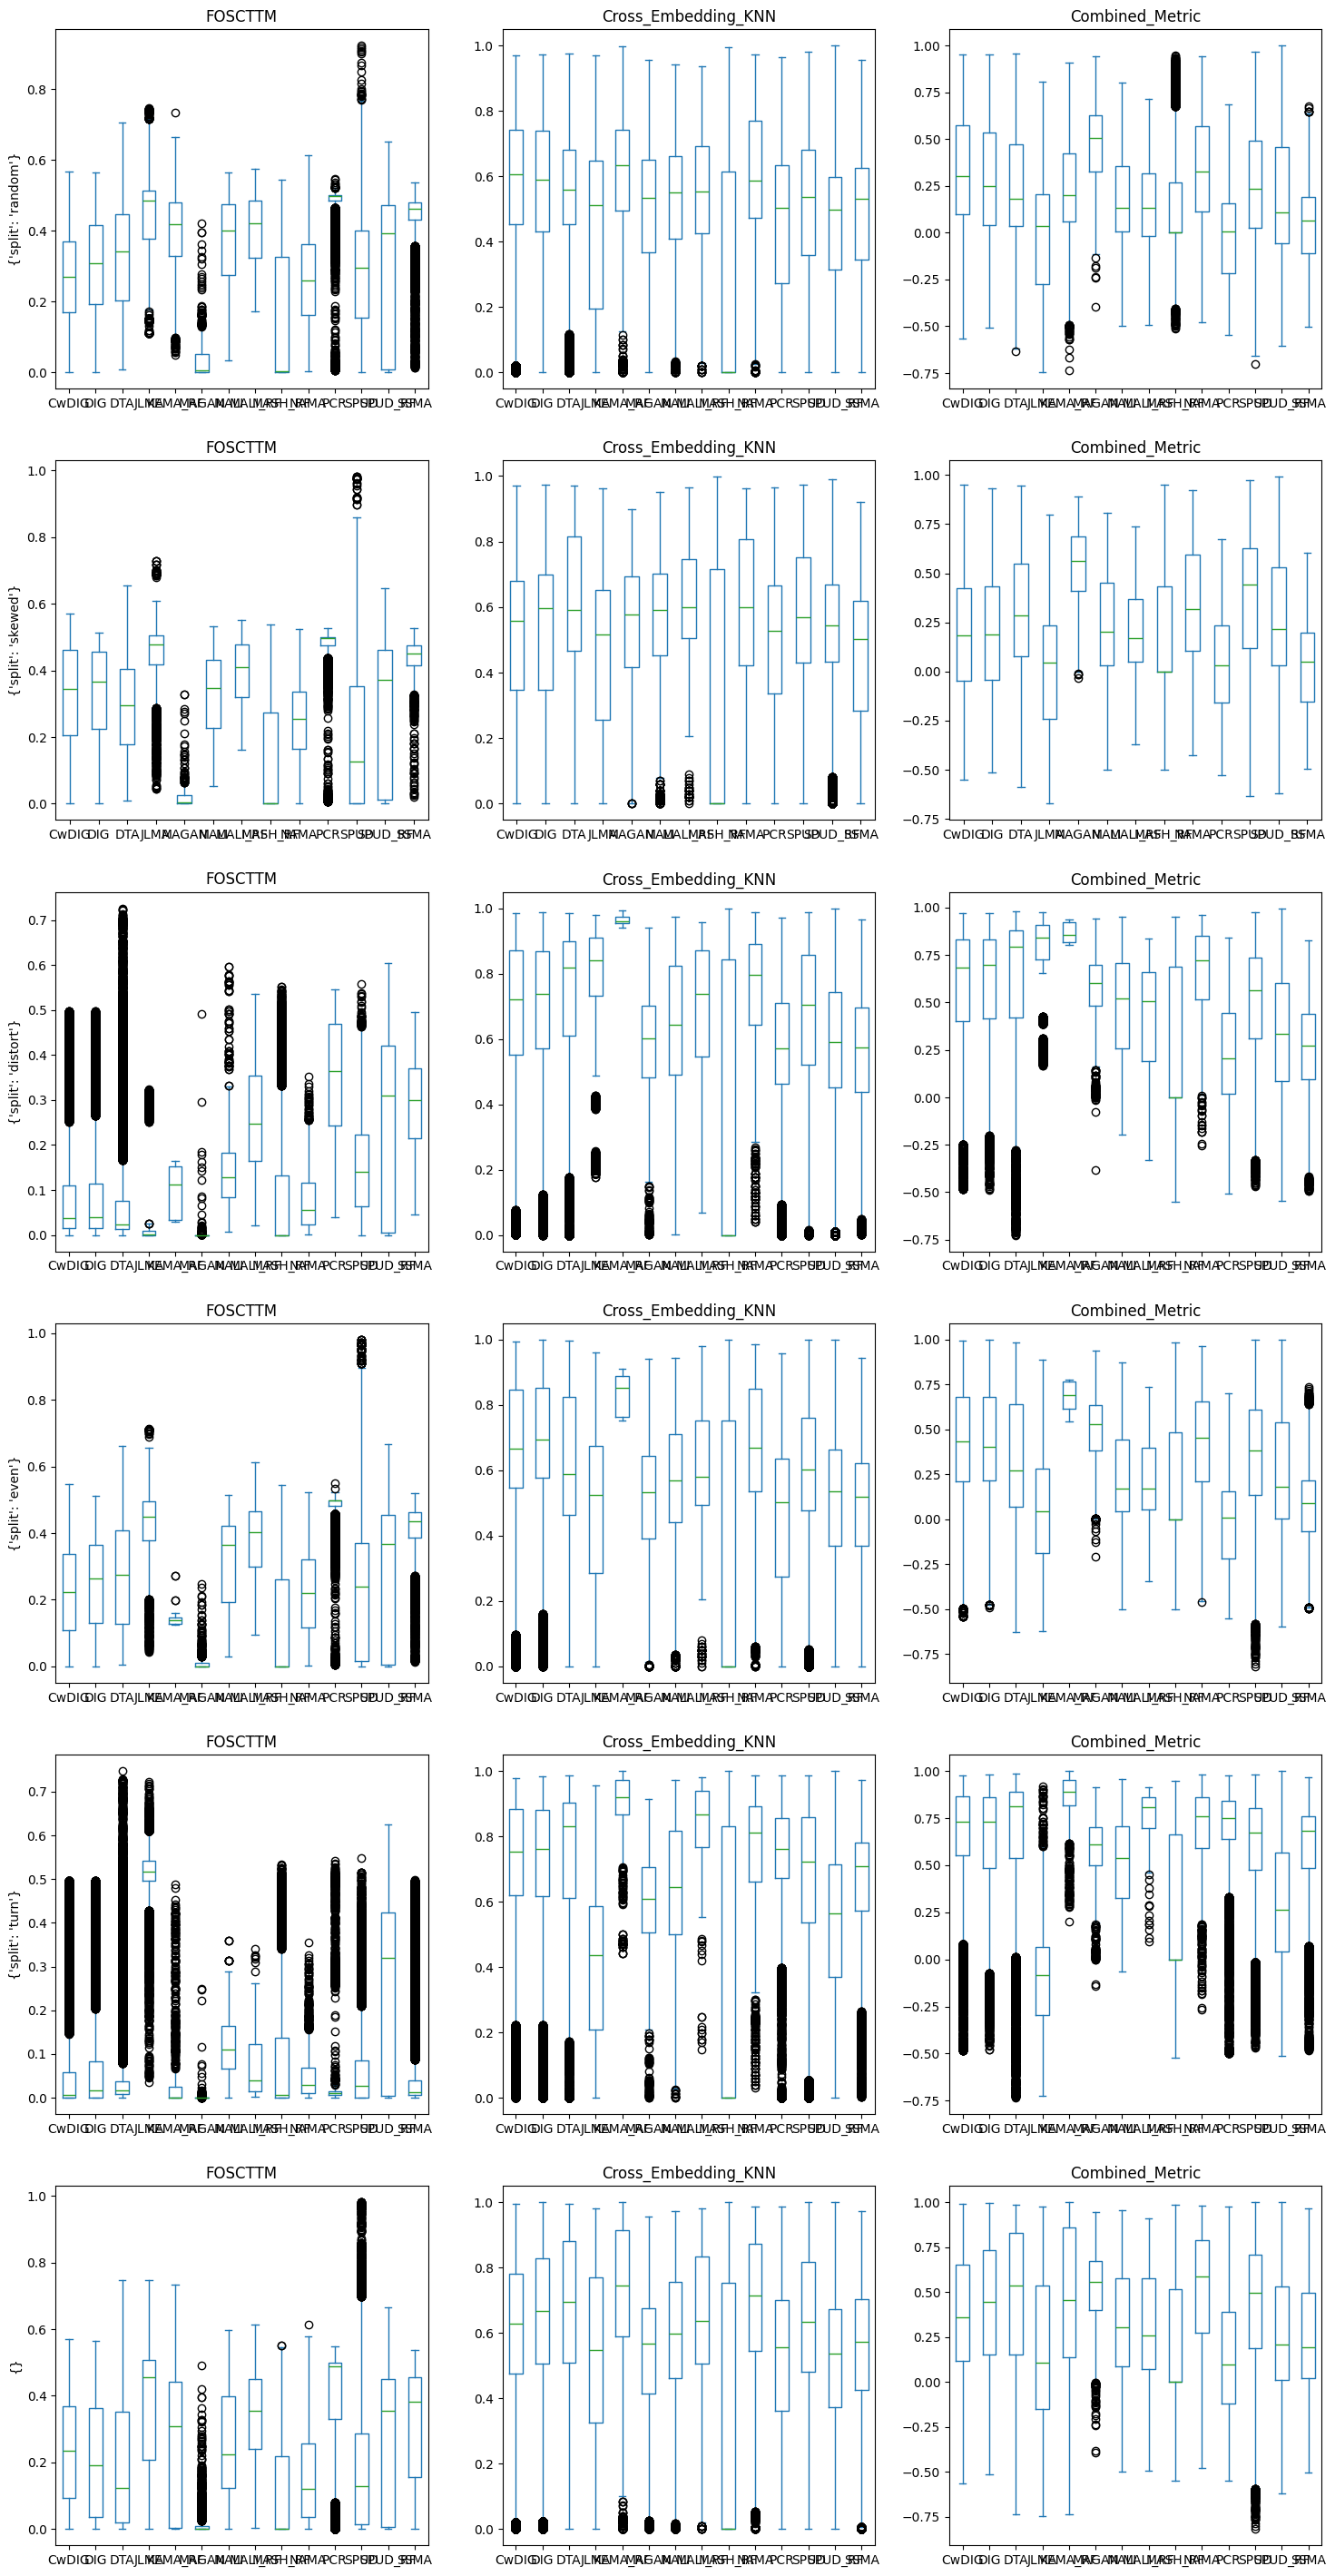

In [9]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         },
         {}]

plot_in_fig(df = df, columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

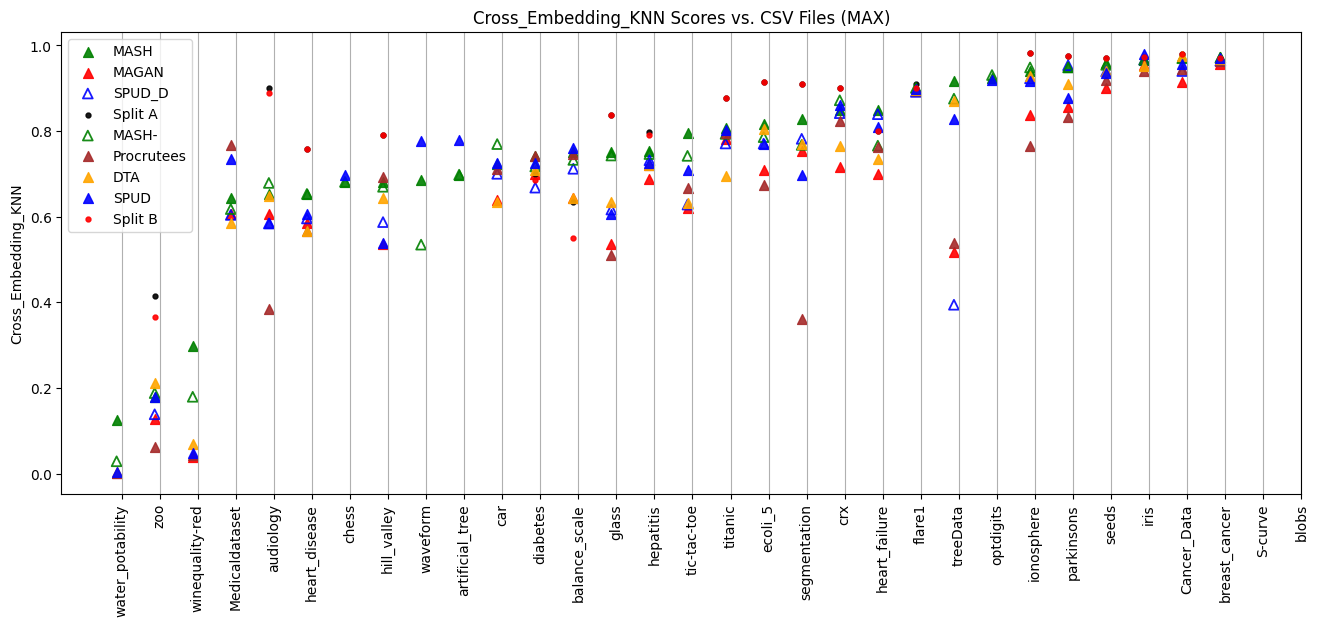

In [10]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "Cross_Embedding_KNN", plot_methods = ["PCR", "MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG", "Split_A", "Split_B"])

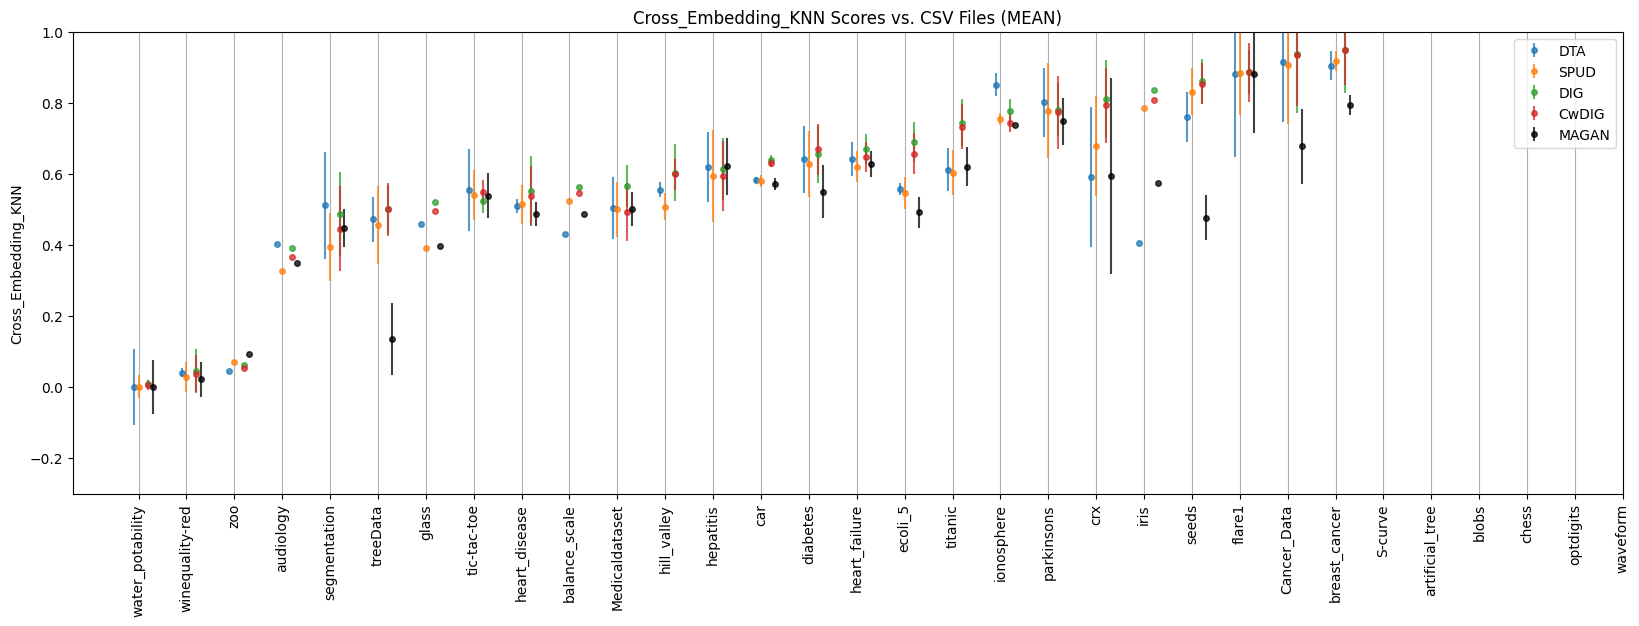

In [11]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG"])

RF Plots

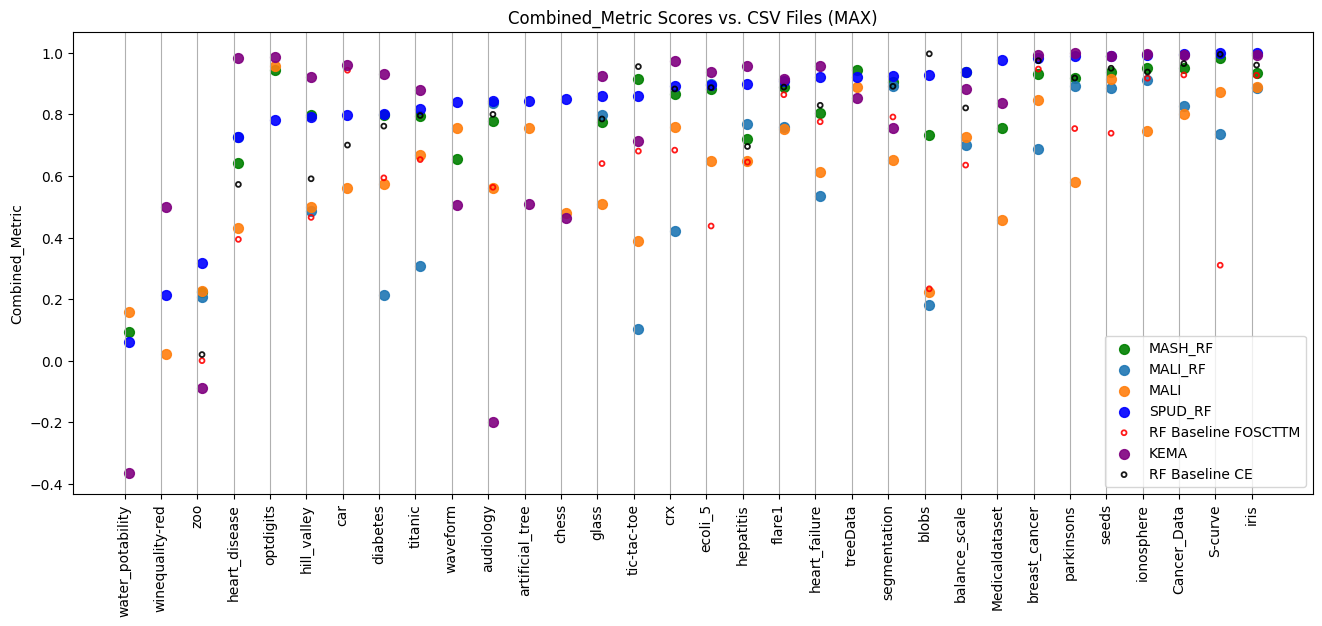

In [2]:
#RF Plot
plt_methods_by_CSV_max(df = rf_df, sort_by= "SPUD_RF", metric = "Combined_Metric",  plot_methods = ["MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI", "BL_CE", "BL_FOSCTTM"])

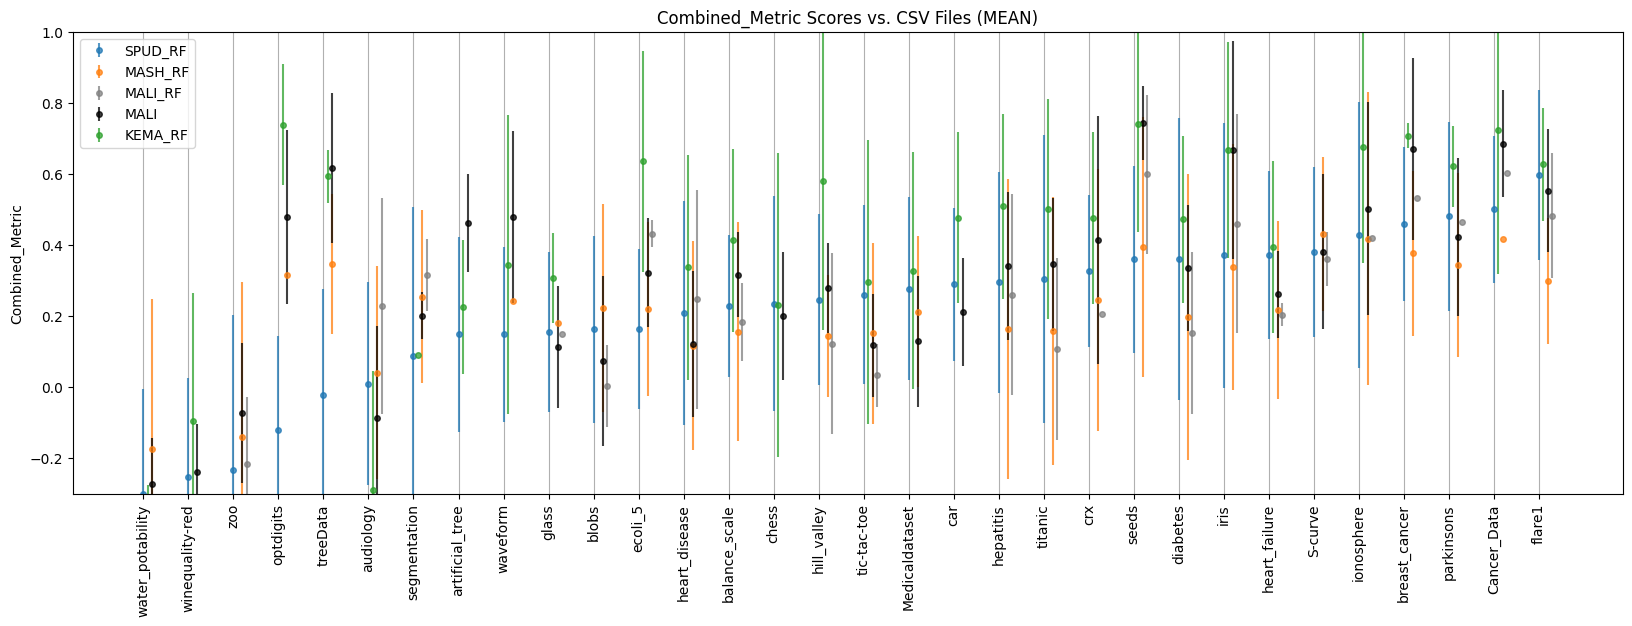

In [13]:
plt_methods_by_CSV_mean(df = rf_df, metric = "Combined_Metric", sort_by="SPUD_RF", plot_methods = ["MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI"])

### Simple Ranking

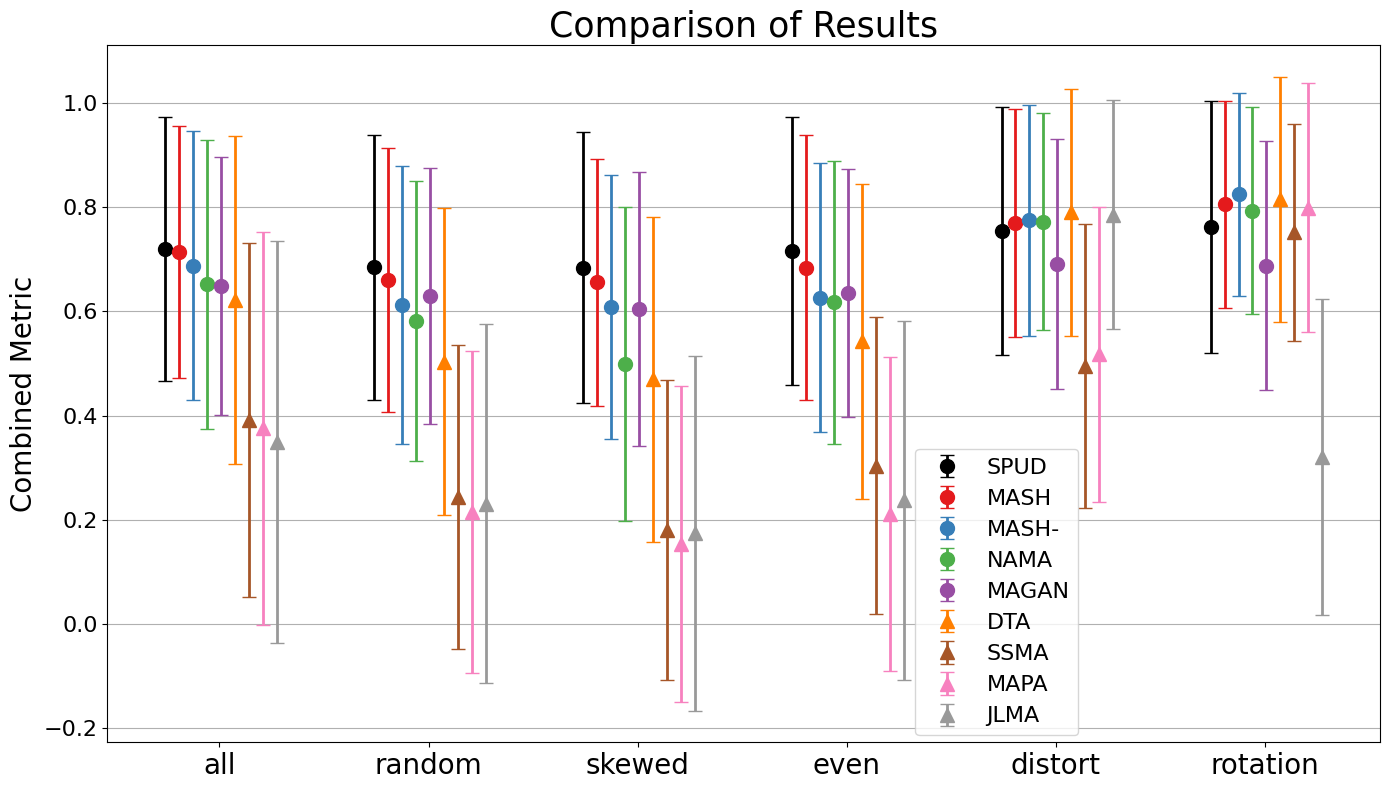

In [14]:
plot_ranks(columns_to_drop = ["BL_FOSCTTM", "SPUD_RF", "KEMA_RF", "MASH_RF", "MALI", "MALI_RF"])

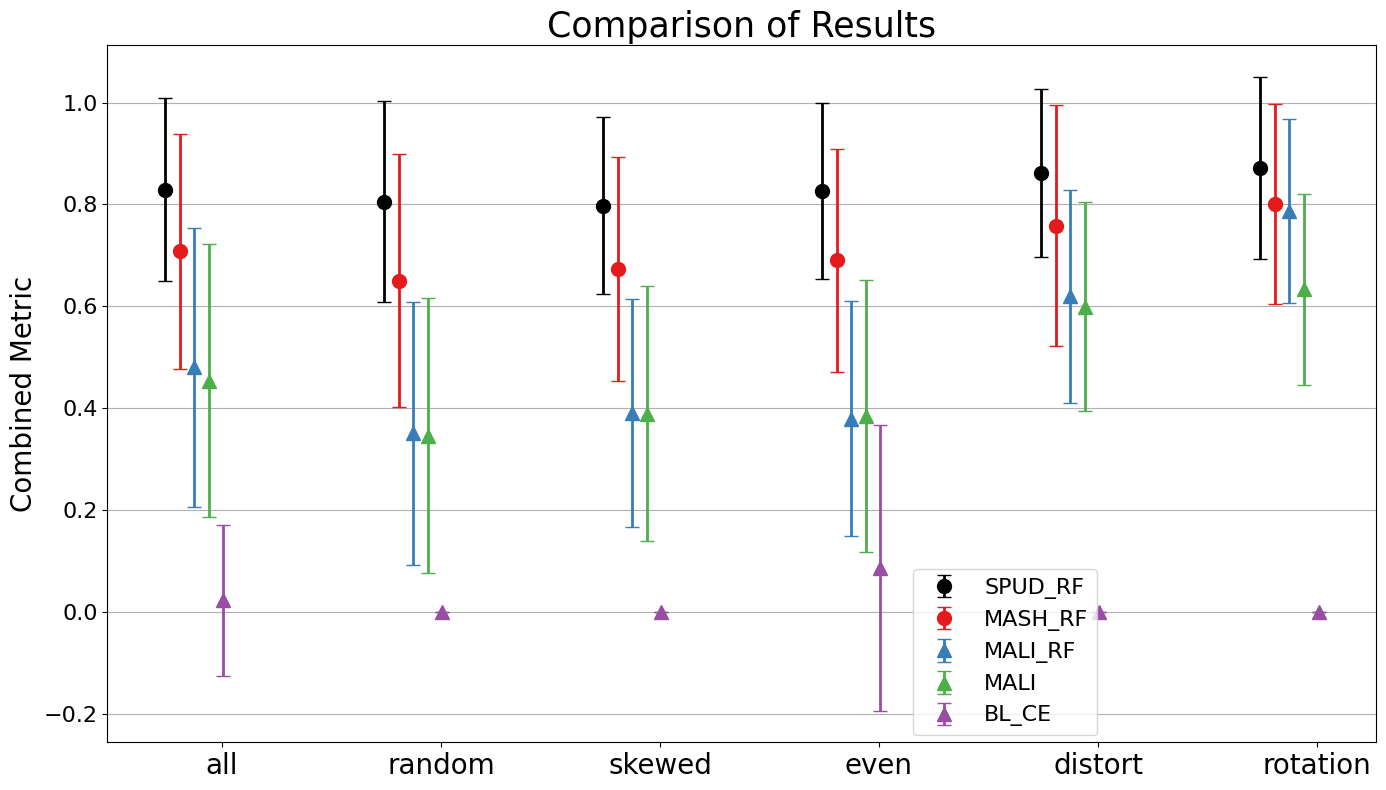

In [15]:
plot_ranks(df = rf_df, columns_to_drop = ['SSMA', 'MAGAN', 'DTA',"KEMA_RF", 'SPUD_D', 'SPUD', 'DIG', 'CwDIG', 'NAMA', 'PCR', 'JLMA', "BL_FOSCTTM"])

## Comparing Parameters across all methods

### Line Plots

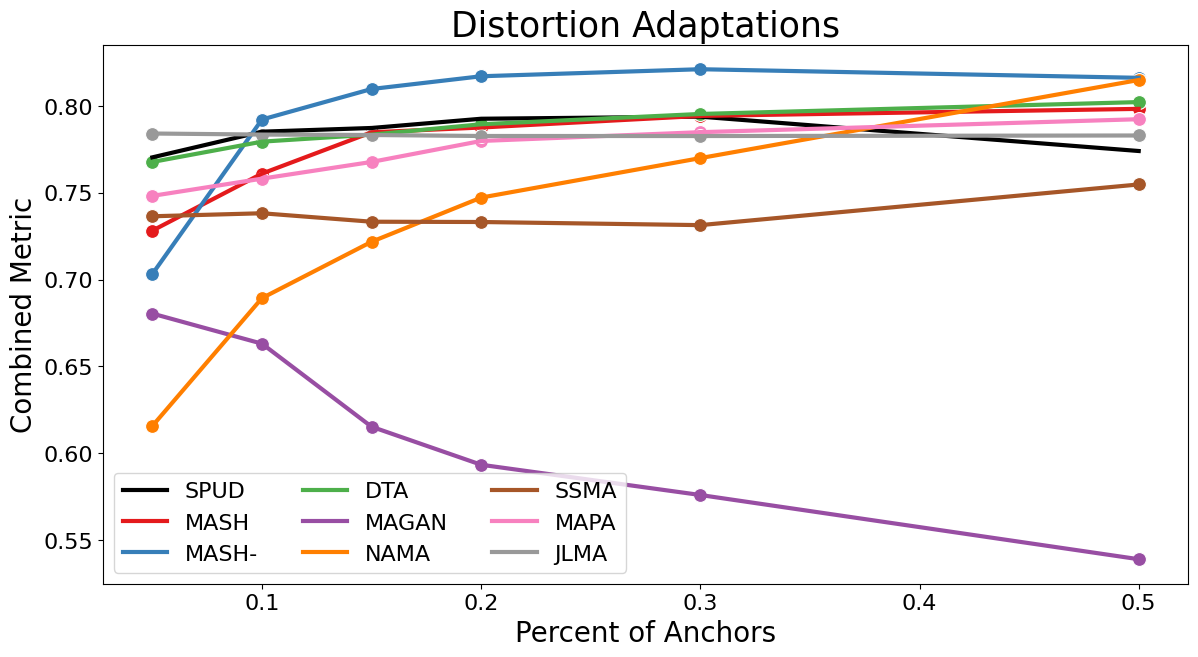

In [16]:
distort_turn = df[df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = distort_turn, metric = "Combined_Metric", custom_title="Distortion Adaptations", plt_legend = (0.01, 0.02))

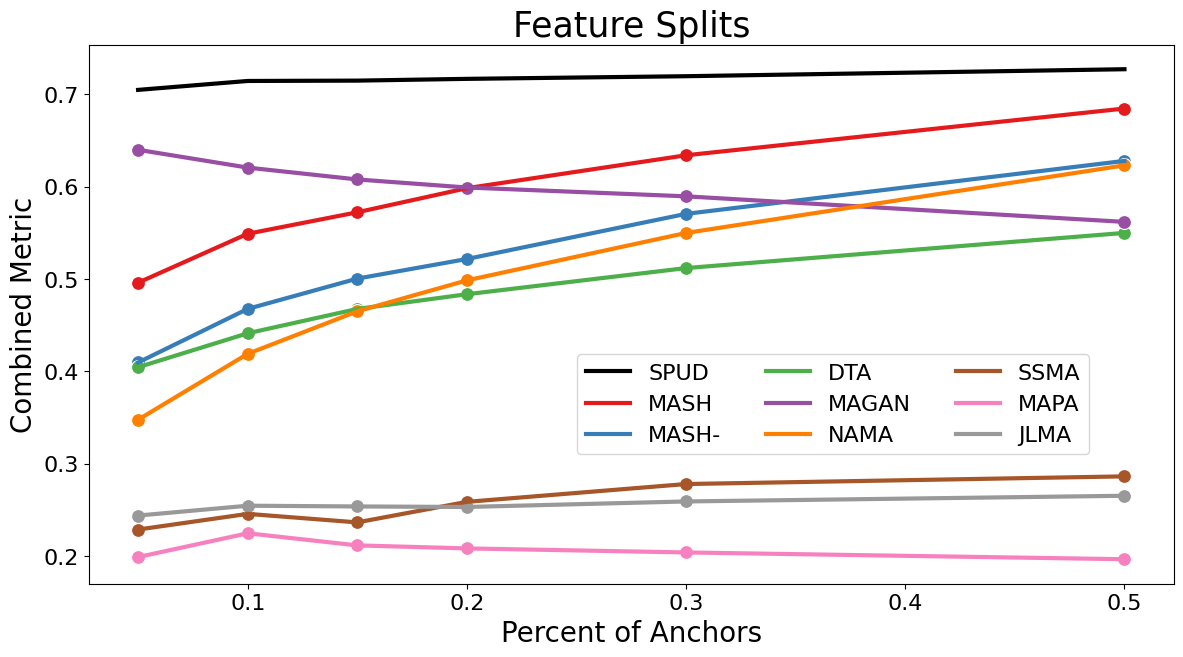

In [17]:
feature_splits = df[~df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = feature_splits, metric = "Combined_Metric", plt_legend = (0.45, 0.24), custom_title="Feature Splits")

### Contrasting RF to default

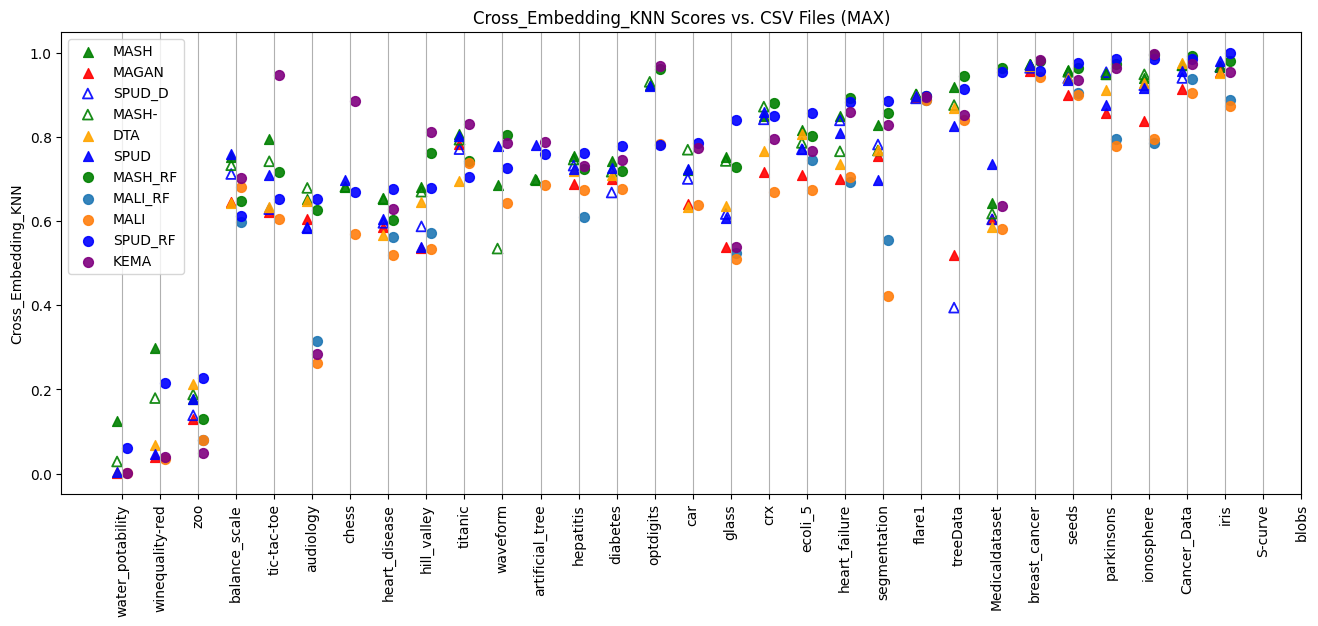

In [18]:
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), sort_by = "SPUD_RF", metric = "Cross_Embedding_KNN", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG", "MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI"])

In [19]:
df["method"].unique()

array(['MAGAN', 'SPUD', 'DTA', 'CwDIG', 'NAMA', 'DIG', 'PCR', 'JLMA',
       'SSMA', 'SPUD_RF', 'MALI_RF', 'MALI', 'MASH_RF', 'KEMA_RF'],
      dtype=object)

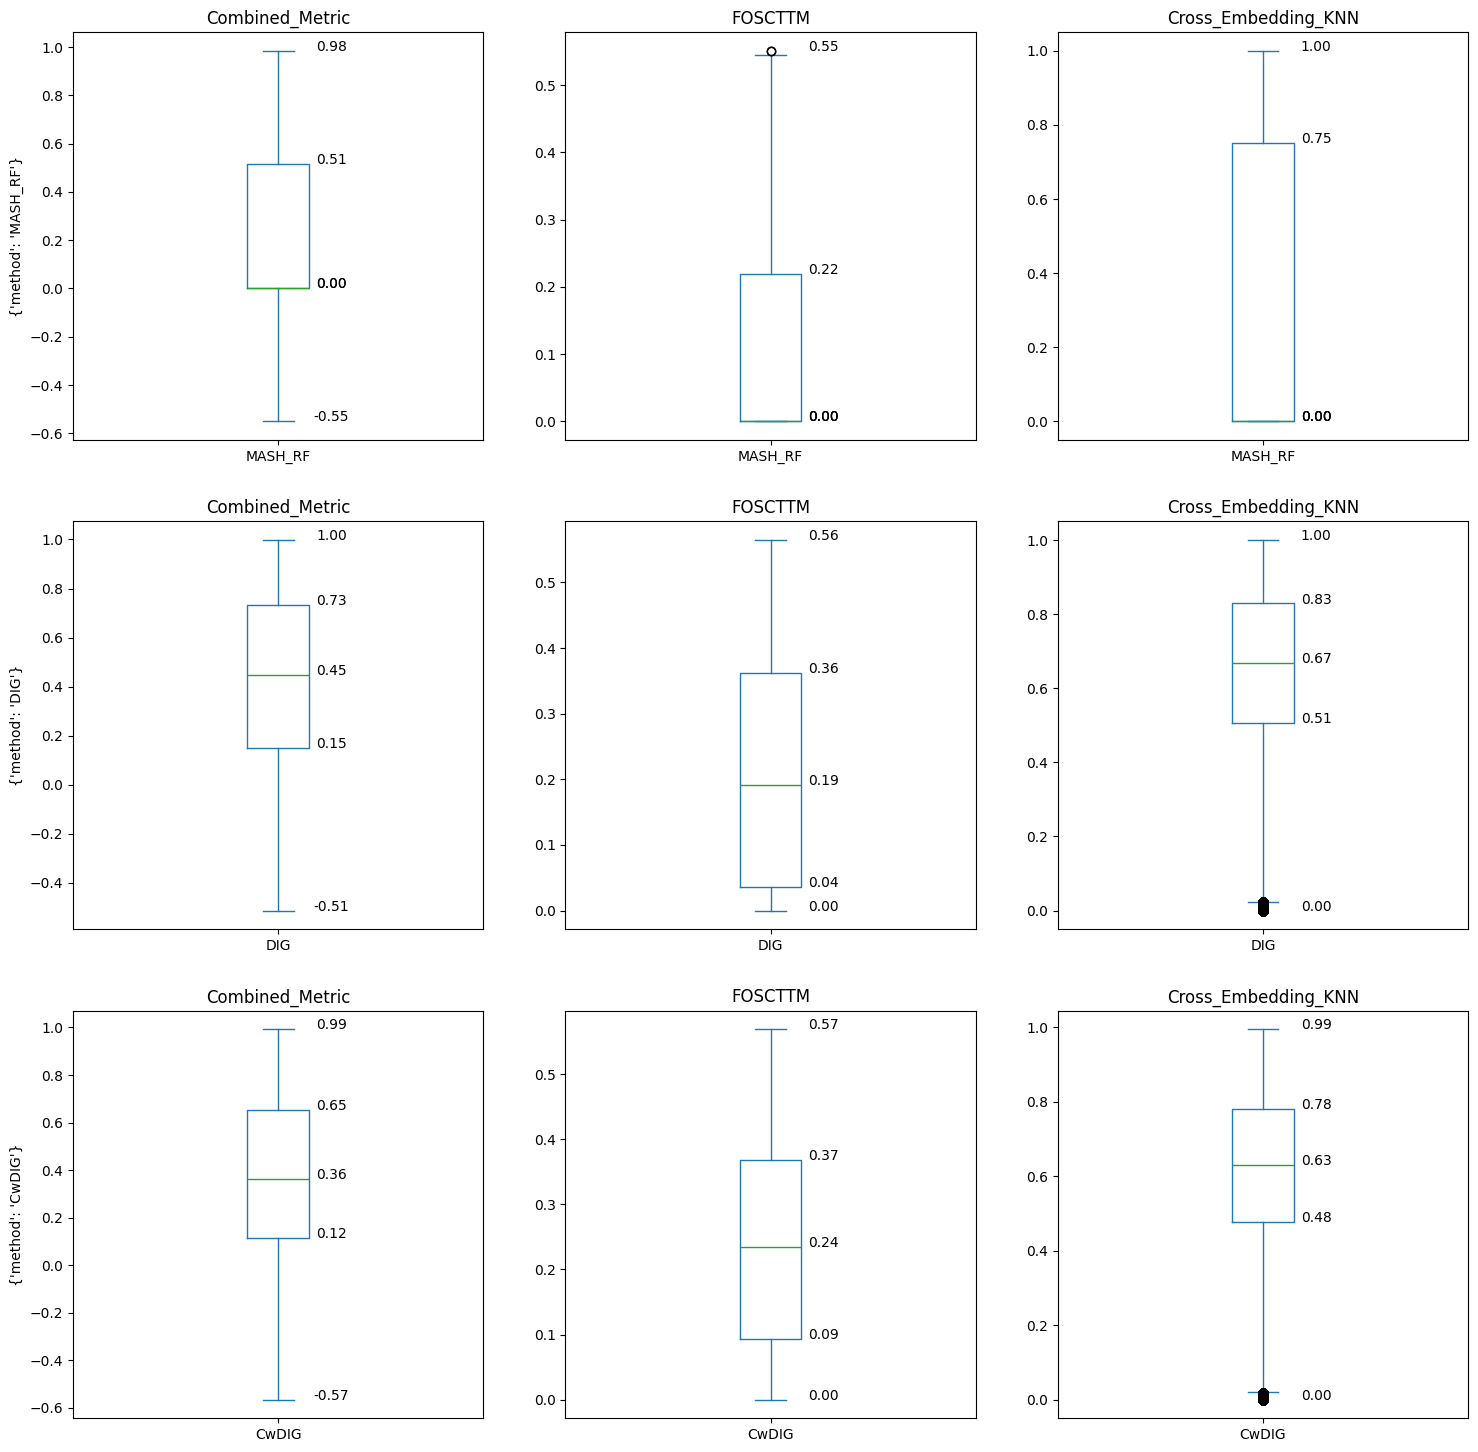

In [20]:
columns = [{"column": 'Combined_Metric'}, {"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}]
rows = [{"method" : "MASH_RF" #, "csv_file" : "iris"
        }, 
        {"method" : "DIG",
        },
        {"method" : "CwDIG",
        }]

plot_in_fig(df=df, columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

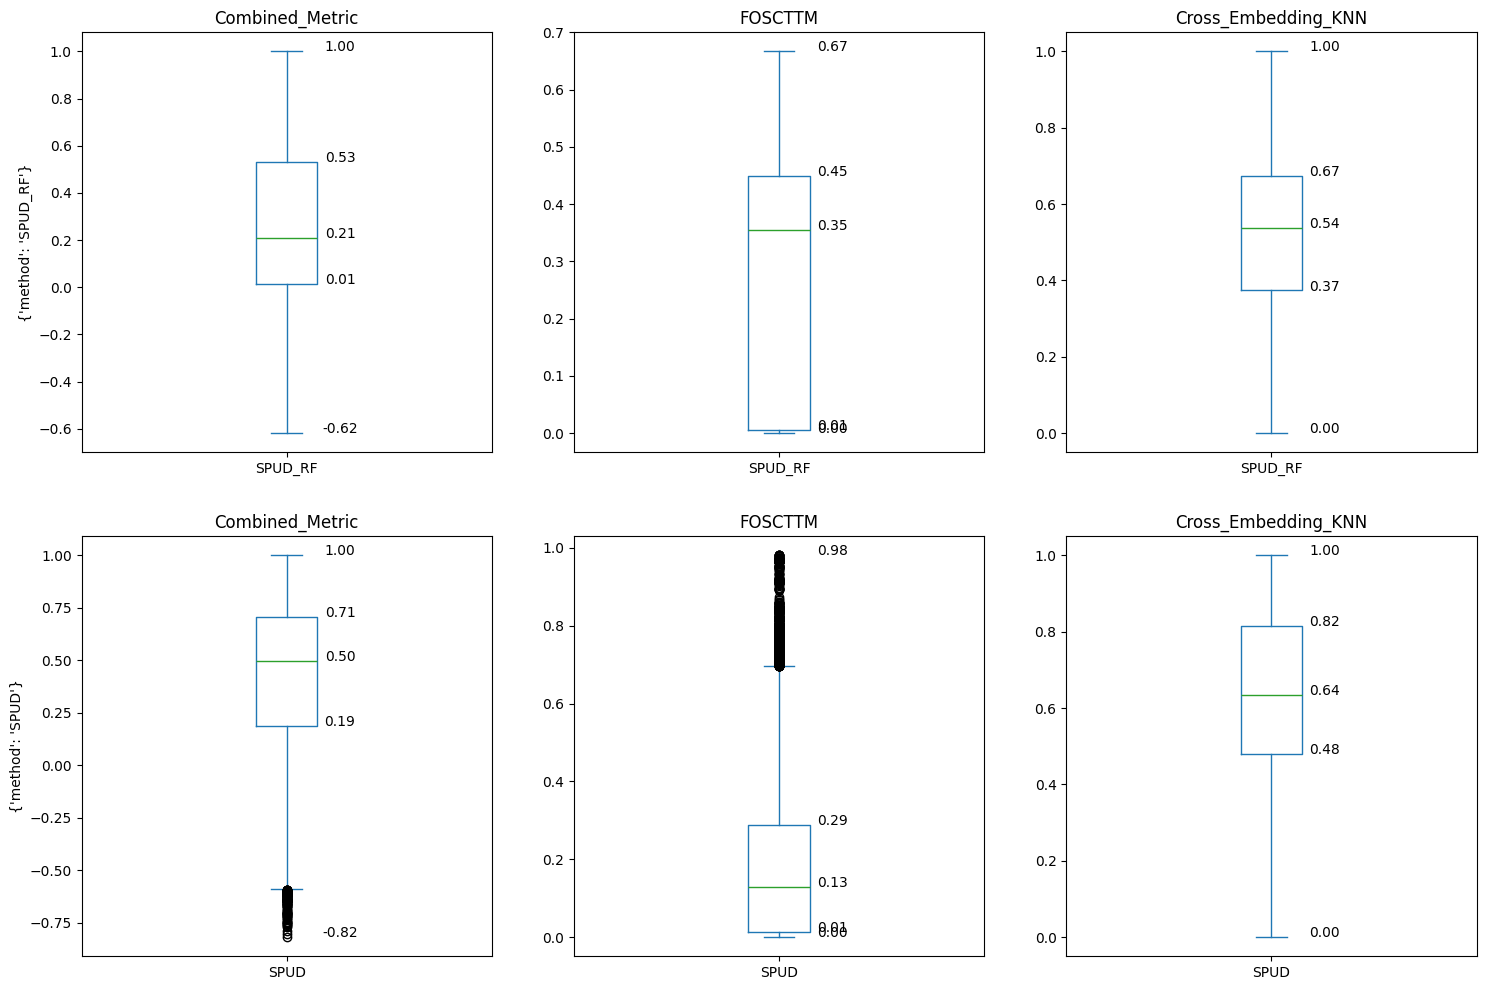

In [21]:
columns = [{"column": 'Combined_Metric'}, {"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}]
rows = [{"method" : "SPUD_RF" #, "csv_file" : "iris"
        }, 
        {"method" : "SPUD",
        }]

plot_in_fig(df=df, columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

### Sparse Data comparison

#### Set Up

In [22]:
from SPUD_Copy import SPUD_Copy
from DIG import DIG

In [23]:
sparse_dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)
sparse_dc.split_A = sparse_dc.split_A
sparse_dc.split_B = sparse_dc.split_B
#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


#### Sparse DIG

In [24]:
sparse_DIG = DIG(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, DTM = "log", knn = 4)

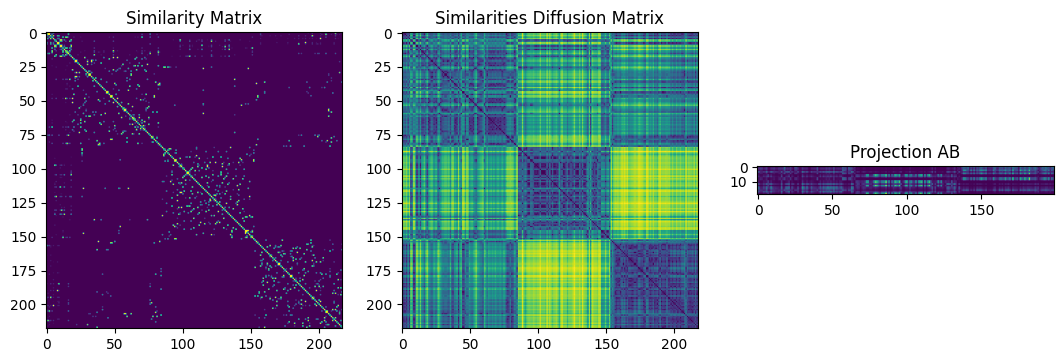

In [25]:
sparse_DIG.plot_graphs()

Model Stress: 91.00021307559541
Cross Embedding: 0.8391959798994975
Can't compute FOSCTTM with different domain shapes.


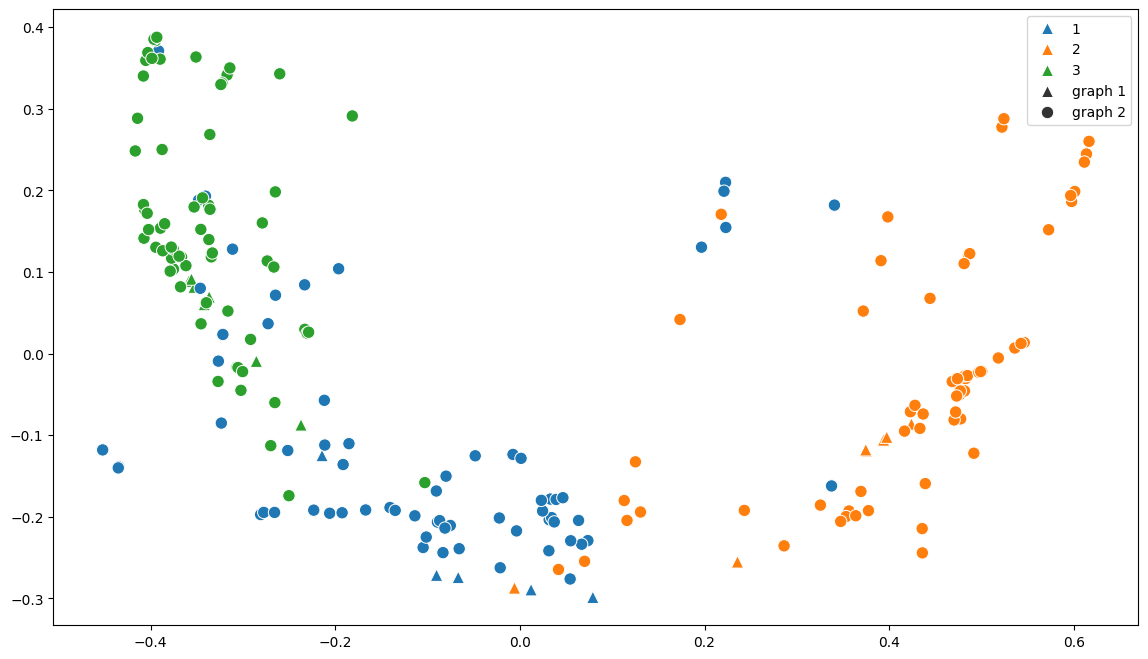

In [26]:
sparse_DIG.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

#### Sparse SPUD

In [27]:
sparse_spud = SPUD_Copy(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, operation = "sqrt", knn = 4)
#sparse_spud.plot_graphs()

Model Stress: 119.01061572536022
Cross Embedding: 0.8118222692409416
Can't compute FOSCTTM with different domain shapes.


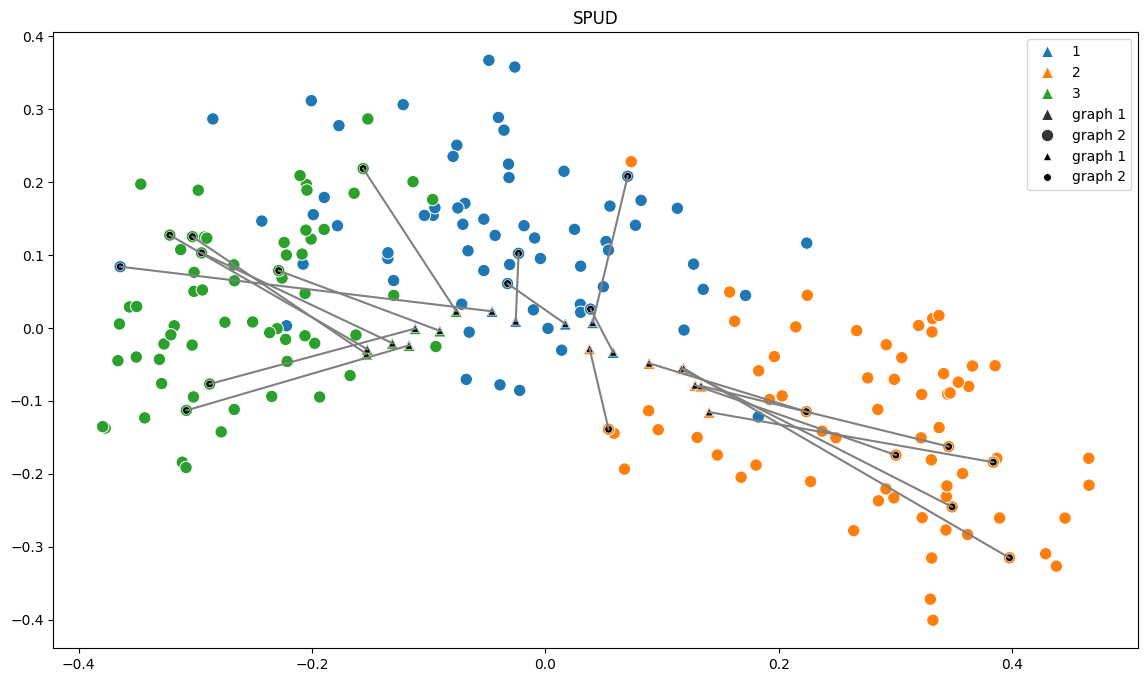

In [28]:

sparse_spud.plot_emb(sparse_labels, show_lines = False, show_anchors = True)

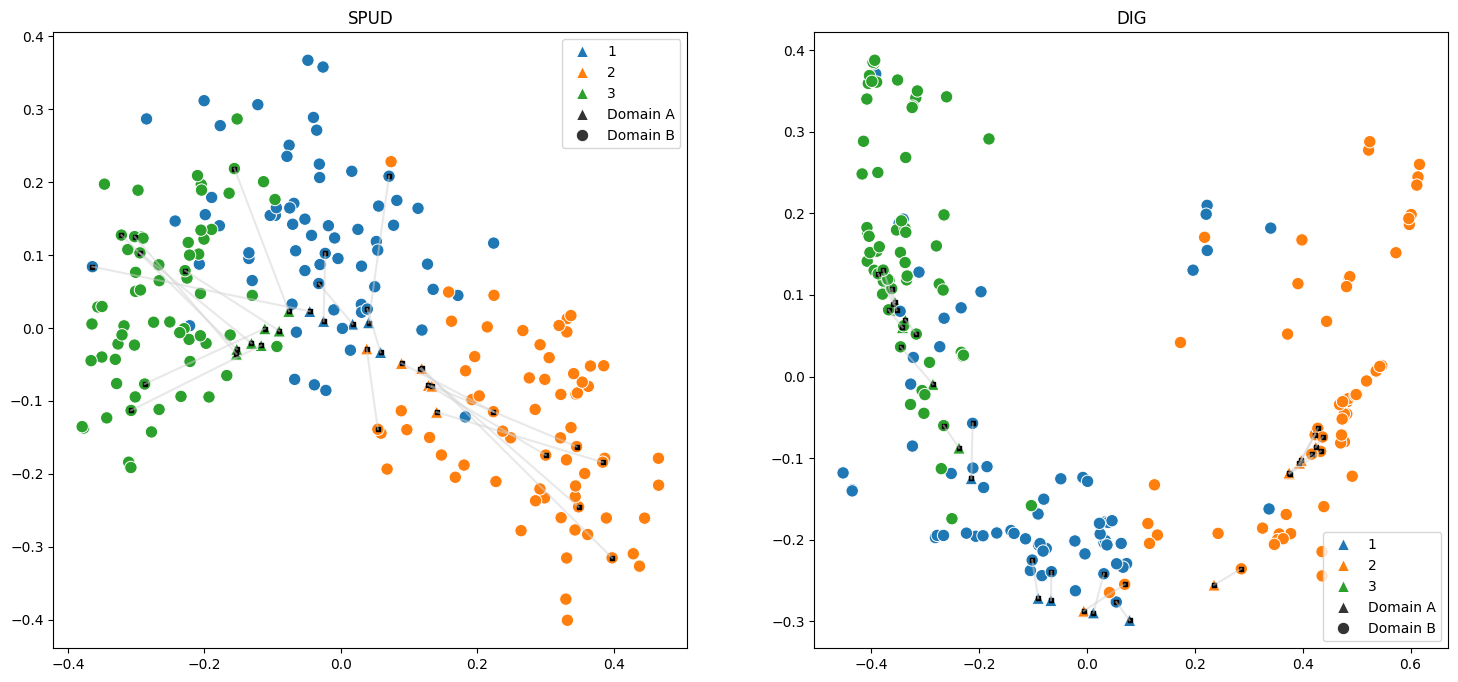

<Figure size 1400x800 with 0 Axes>

In [29]:
#Plot them side by side
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Set Title
axes[0].set_title("SPUD")
axes[1].set_title("DIG")

#Veiw the manifold. Those shown as Triangles are from GX
styles = ['Domain A' if i < sparse_spud.len_A else 'Domain B' for i in range(len(sparse_spud.emb[:]))]
plt.figure(figsize=(14, 8))

#Now plot the points
import seaborn as sns
sns.scatterplot(x = sparse_spud.emb[:, 0], y = sparse_spud.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[0])
sns.scatterplot(x = sparse_DIG.emb[:, 0], y = sparse_DIG.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[1])

#To plot line connections
for position, point in enumerate(random_points):
    axes[0].plot([sparse_spud.emb[position, 0], sparse_spud.emb[sparse_spud.len_A + point, 0]], [sparse_spud.emb[position, 1], sparse_spud.emb[sparse_spud.len_A + point, 1]], color = 'lightgrey', alpha = .5)
    axes[1].plot([sparse_DIG.emb[position, 0], sparse_DIG.emb[sparse_DIG.len_A + point, 0]], [sparse_DIG.emb[position, 1], sparse_DIG.emb[sparse_DIG.len_A + point, 1]], color = 'lightgrey', alpha = .5)

#Put black dots on the Anchors
axes[0].scatter(sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")
axes[1].scatter(sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")


#Show plot
plt.show()

## Label Prediction Visualization

In [30]:
dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "distort", percent_of_anchors= [0.8], verbose=2, random_state=42)


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

MDS initialized with 7 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


Cross Embedding: 0.9058450145464163
Can't compute FOSCTTM with different domain shapes.


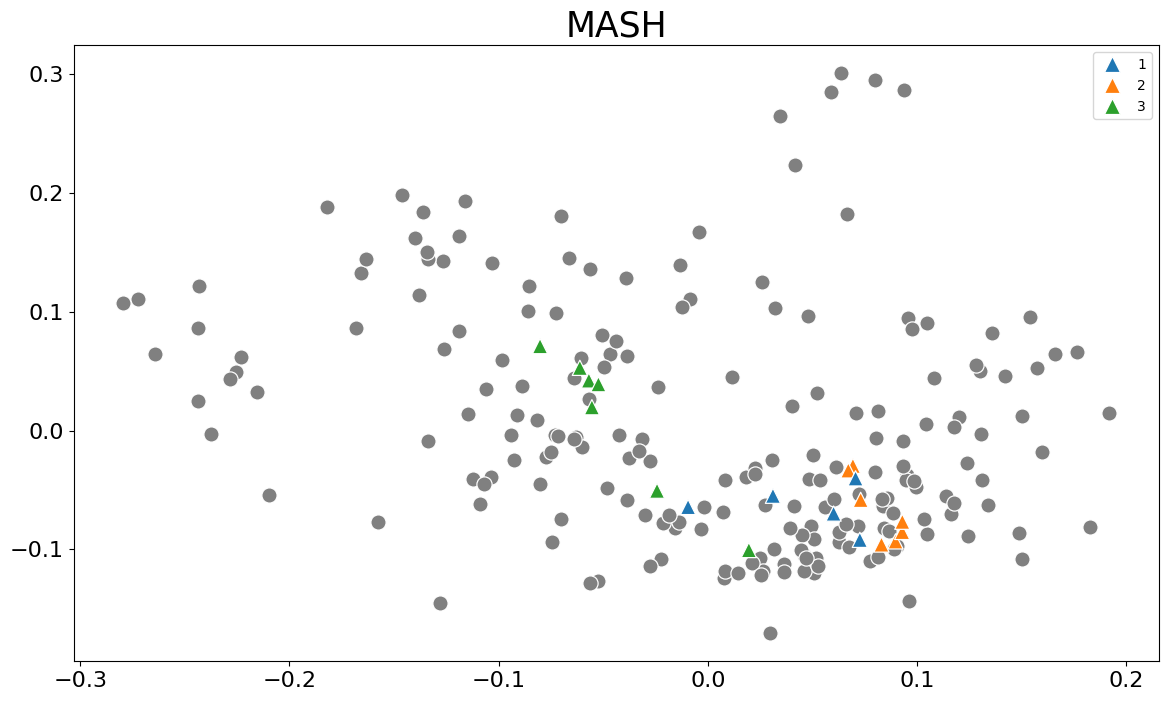

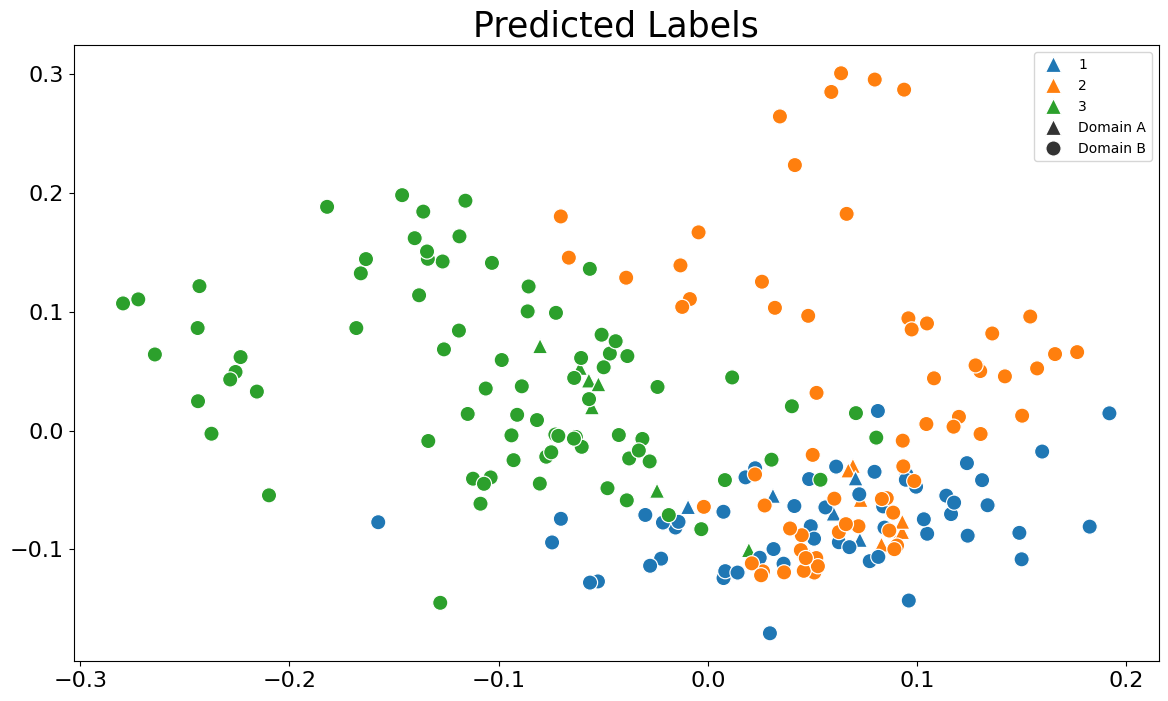

In [31]:
from MASH import MASH
LPD = MASH()
LPD.fit(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors)
LPD.plot_emb(sparse_labels, show_lines = False, show_anchors = False, show_pred = True, n_comp = 7) #Gets the embedding we can use

# Time Comparisions Below

# Parameter Adjustment Heat map

In [33]:
from Visualization_helpers import plot_param_heat_map

## Mash

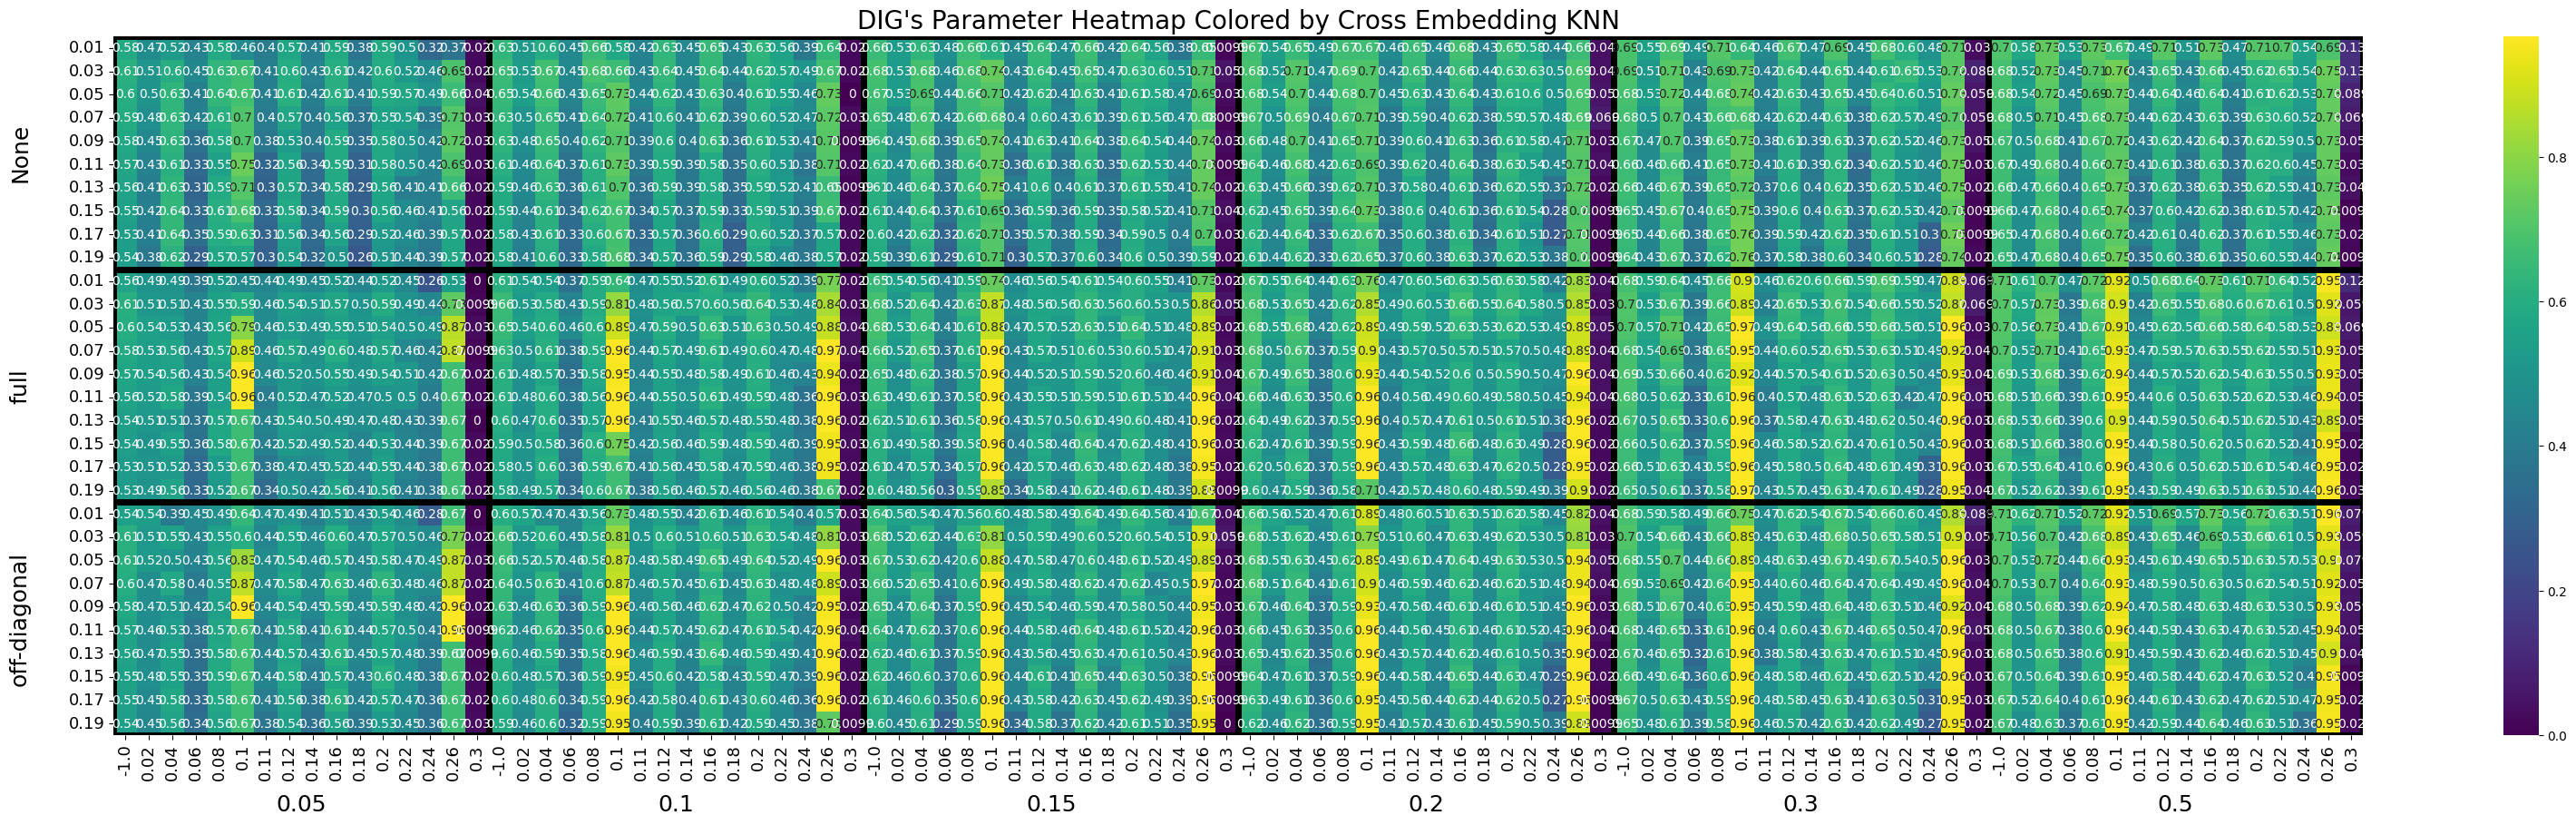

In [34]:
plot_param_heat_map(df = og_df, parameters = [ "Page_Rank", 'Percent_of_KNN', "Percent_of_Anchors", "t_value"], method = "DIG", metric = "Cross_Embedding_KNN", figsize = (40, 10))

## SPUD

In [35]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 't_value', 'Predicted_Feature_MAE',
       'Operation', 'algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

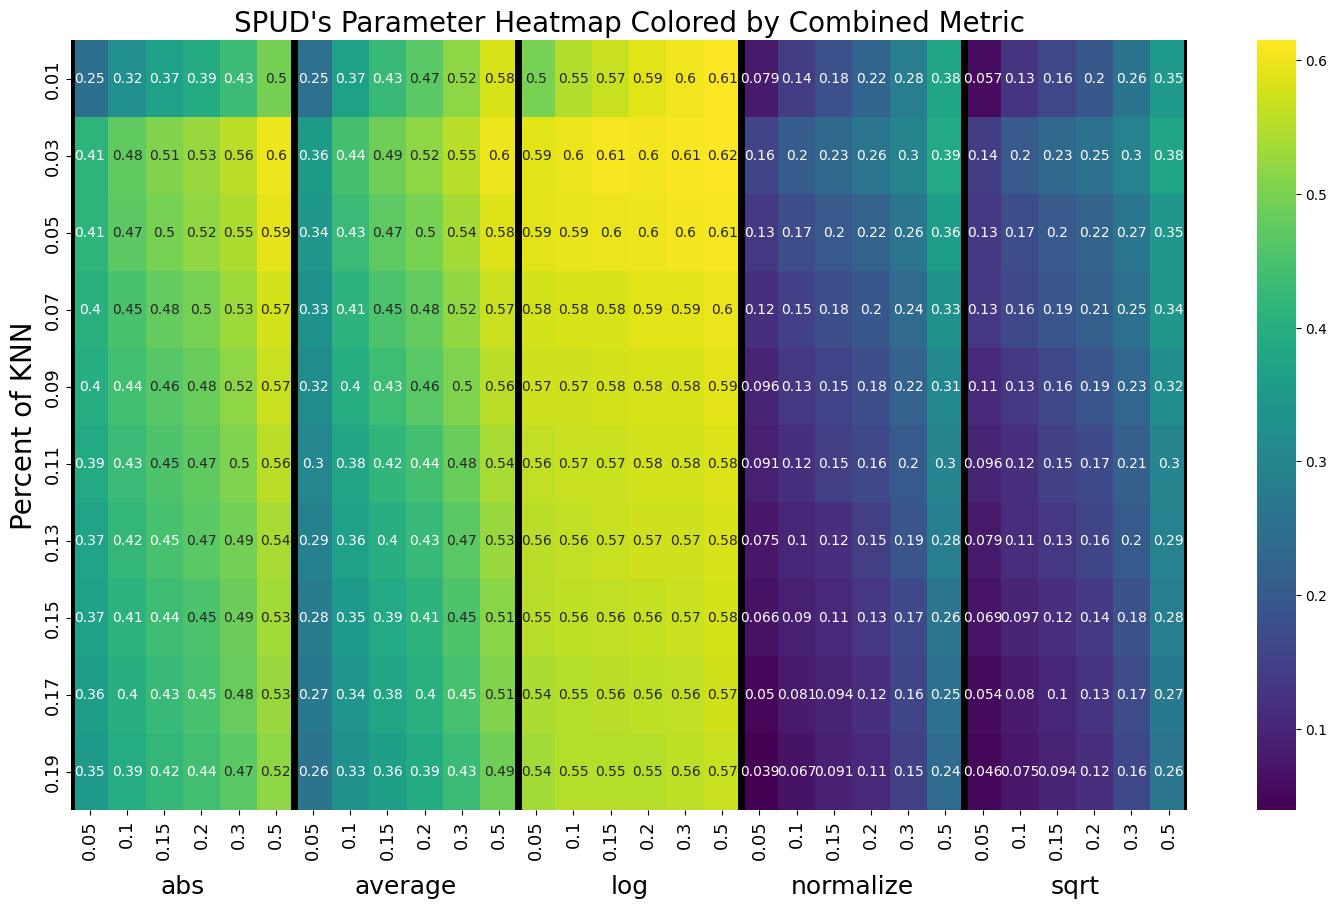

In [37]:
plot_param_heat_map(df = og_df, parameters=["Percent_of_KNN", "Operation", 'Percent_of_Anchors'],method =  "SPUD" , figsize=(18, 10))